In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ../TileEM/

/srv/data/home/jlee782/crowd-seg/analysis/TileEM


In [4]:
%load_ext autoreload
%autoreload 2
from paper_visualizations import * 
from PixelEM import * 
from test_sample import test_sample_obj
import json

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
ls ../TileEM/pixel_em/*.csv

../TileEM/pixel_em/basic_ground_truth_full_PRJ_table.csv
../TileEM/pixel_em/full_PRJ_table.csv
../TileEM/pixel_em/full_PR_table.csv
../TileEM/pixel_em/_ground_truth_full_PRJ_table.csv
../TileEM/pixel_em/GTfull_PRJ_table.csv
../TileEM/pixel_em/GT_ground_truth_full_PRJ_table.csv
../TileEM/pixel_em/GTLSA_ground_truth_full_PRJ_table.csv
../TileEM/pixel_em/isoGT_ground_truth_full_PRJ_table.csv
../TileEM/pixel_em/isoGTLSA_ground_truth_full_PRJ_table.csv
../TileEM/pixel_em/old_full_PR_table.csv


In [18]:
full = pd.read_csv("../TileEM/pixel_em/full_PRJ_table.csv") #Pixel EM basic + MV 

In [23]:
MV = full[['num_workers', u'sample_num', u'objid', u'thresh', u'MV_precision',
       u'MV_recall', u'MV_jaccard']]

In [27]:
basic = pd.read_csv("../TileEM/pixel_em/basic_ground_truth_full_PRJ_table.csv")
GT = pd.read_csv("../TileEM/pixel_em/GT_ground_truth_full_PRJ_table.csv")
isoGT = pd.read_csv("../TileEM/pixel_em/isoGT_ground_truth_full_PRJ_table.csv")
GTLSA = pd.read_csv("../TileEM/pixel_em/GTLSA_ground_truth_full_PRJ_table.csv")
isoGTLSA = pd.read_csv("../TileEM/pixel_em/isoGTLSA_ground_truth_full_PRJ_table.csv")

In [11]:
len(basic)/46/5

5

In [51]:
mode = 'MV'
df = full[['num_workers', u'sample_num', u'objid', u'thresh', u'MV_precision',
       u'MV_recall', u'MV_jaccard']]
df = df.rename(columns={"MV_precision":"P [{}]".format(mode),
                       "MV_recall":"R [{}]".format(mode),
                       "MV_jaccard":"J [{}]".format(mode),})
for mode in  ["GT","isoGT","GTLSA","isoGTLSA","basic"]:
    data =  pd.read_csv("../TileEM/pixel_em/{}_ground_truth_full_PRJ_table.csv".format(mode))
    data = data.rename(columns={"EM_precision":"P [{}]".format(mode),
                       "EM_recall":"R [{}]".format(mode),
                       "EM_jaccard":"J [{}]".format(mode),})
    df = df.merge(data)

In [52]:
metric_keys=[u'P [MV]',u'R [MV]', u'J [MV]', u'P [GT]', u'R [GT]', u'J [GT]', u'P [isoGT]',
       u'R [isoGT]', u'J [isoGT]', u'P [GTLSA]', u'R [GTLSA]', u'J [GTLSA]',
       u'P [isoGTLSA]', u'R [isoGTLSA]', u'J [isoGTLSA]', u'P [basic]',
       u'R [basic]', u'J [basic]']

In [53]:
df.mean()[metric_keys]

P [MV]          0.948538
R [MV]          0.923649
J [MV]          0.878552
P [GT]          0.917940
R [GT]          0.967939
J [GT]          0.890974
P [isoGT]       0.916262
R [isoGT]       0.929777
J [isoGT]       0.855844
P [GTLSA]       0.898499
R [GTLSA]       0.937643
J [GTLSA]       0.851463
P [isoGTLSA]    0.896708
R [isoGTLSA]    0.916566
J [isoGTLSA]    0.829680
P [basic]       0.947801
R [basic]       0.933043
J [basic]       0.887108
dtype: float64

In [54]:
df.filter(regex="J").mean()

J [MV]          0.878552
J [GT]          0.890974
J [isoGT]       0.855844
J [GTLSA]       0.851463
J [isoGTLSA]    0.829680
J [basic]       0.887108
dtype: float64

GT> basic>MV>isoGT=GTLSA>isoGTLSA

but isoGTLSA high variance

In [55]:
df.filter(regex="J").std()

J [MV]          0.113092
J [GT]          0.075440
J [isoGT]       0.204375
J [GTLSA]       0.147771
J [isoGTLSA]    0.246405
J [basic]       0.095751
dtype: float64

#### Ranking Jaccard 

In [94]:
rank_df = df[df["thresh"]==0][Jkeys].rank(axis=1,ascending=False,method="average")
rank_df.mean()

J [MV]          3.988636
J [GT]          3.678977
J [isoGT]       2.394886
J [GTLSA]       5.156250
J [isoGTLSA]    2.264205
J [basic]       3.517045
dtype: float64

In [95]:
df[df["thresh"]==0][Jkeys].mean()

J [MV]          0.878552
J [GT]          0.892654
J [isoGT]       0.888897
J [GTLSA]       0.871177
J [isoGTLSA]    0.883784
J [basic]       0.886839
dtype: float64

In [103]:
# Check that lower numbers correspond to lower values 
# rank_df.head()

# df[df["thresh"]==0][Jkeys].head()

Lower ranks means higher J. isoGT and isGTLSA does better in rank. 

#### Visualizations 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x681a150>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x6d54290>]], dtype=object)

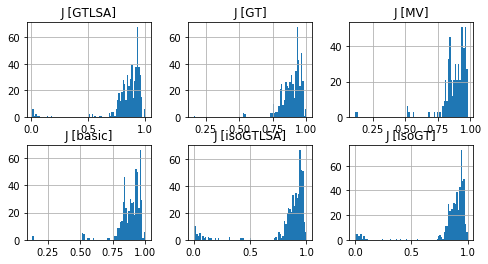

In [56]:
fig = plt.figure()
df.filter(regex="J").hist(bins=80,layout=(2,3),figsize=(8,4))

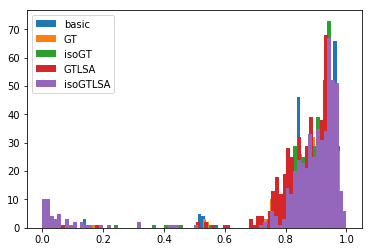

In [57]:
a = plt.hist(df["J [basic]"],label="basic",bins=80)
a = plt.hist(df["J [GT]"],label="GT",bins=80)
a = plt.hist(df["J [isoGT]"],label="isoGT",bins=80)
a = plt.hist(df["J [GTLSA]"],label="GTLSA",bins=80)
a = plt.hist(df["J [isoGTLSA]"],label="isoGTLSA",bins=80)
plt.legend()

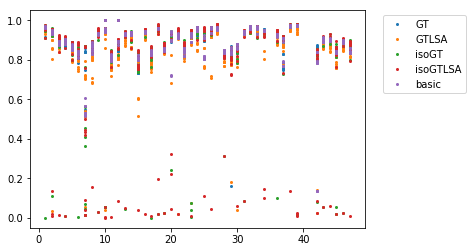

In [66]:
a = plt.plot(df["objid"],df["J [GT]"],'.',ms=4,label="GT" )
a = plt.plot(df["objid"],df["J [GTLSA]"],'.',ms=4,label="GTLSA" )
a = plt.plot(df["objid"],df["J [isoGT]"],'.',ms=4,label="isoGT" )
a = plt.plot(df["objid"],df["J [isoGTLSA]"],'.',ms=4,label="isoGTLSA" )
a = plt.plot(df["objid"],df["J [basic]"],'.',ms=4,label="basic")
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

In [67]:
def plot_comparison(x_attr,y1_attr,y2_attr):
    if x_attr=="index":
        a = plt.plot(df.index,df[y1_attr],'.',label=y1_attr)
        a = plt.plot(df.index,df[y2_attr],'x',label=y2_attr )
    else:
        a = plt.plot(df[x_attr],df[y1_attr],'.',label=y1_attr)
        a = plt.plot(df[x_attr],df[y2_attr],'x',label=y2_attr )
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.xlabel(x_attr)

def compare_PRJ_fixedNworkers(y1,y2):
    plt.figure()
    plot_comparison("Nworkers","P [{}]".format(y1),"P [{}]".format(y2))
    plt.figure()
    plot_comparison("Nworkers","R [{}]".format(y1),"R [{}]".format(y2))
    plt.figure()
    plot_comparison("Nworkers","J [{}]".format(y1),"J [{}]".format(y2))


#### If we only look at "good objects", ones with jaccard >0.6 then what would the average look like (i.e. filter out things that has gone terribly wrong, and how many are there)

In [71]:
Jkeys = df.keys()[df.keys().str.contains('J')]

(df[Jkeys]>0.6).sum()

J [MV]          510
J [GT]          522
J [isoGT]       495
J [GTLSA]       510
J [isoGTLSA]    478
J [basic]       514
dtype: int64

In [72]:
df[(df[Jkeys]>0.5).sum(axis=1)==5].filter(regex='J').mean()

J [MV]          0.798170
J [GT]          0.849052
J [isoGT]       0.686295
J [GTLSA]       0.820505
J [isoGTLSA]    0.361174
J [basic]       0.859716
dtype: float64

#### Count how many GTLSA > basic 

In [81]:
df[['J [basic]','J [GTLSA]']].rank(axis=1,ascending=False,method="average").sum()

J [basic]    628
J [GTLSA]    956
dtype: float64

In [82]:
df[['J [basic]','J [GT]']].rank(axis=1,ascending=False,method="average").sum()

J [basic]    786
J [GT]       798
dtype: float64

In [83]:
df[['J [GT]','J [GTLSA]']].rank(axis=1,ascending=False,method="average").sum()

J [GT]       648
J [GTLSA]    936
dtype: float64

#### x: sample (ordered by number of workers) v.s. y: Jaccard (for GTLSA/ basic )(do for PRJ and x as samples / obj aggregation)

In [86]:
def plot_comparison(x_attr,y1_attr,y2_attr):
    if x_attr=="index":
        a = plt.plot(df.index,df[y1_attr],'.',label=y1_attr)
        a = plt.plot(df.index,df[y2_attr],'x',label=y2_attr )
    else:
        a = plt.plot(df[x_attr],df[y1_attr],'.',label=y1_attr)
        a = plt.plot(df[x_attr],df[y2_attr],'x',label=y2_attr )
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.xlabel(x_attr)

def compare_PRJ_fixedNworkers(y1,y2):
    plt.figure()
    plot_comparison("num_workers","P [{}]".format(y1),"P [{}]".format(y2))
    plt.figure()
    plot_comparison("num_workers","R [{}]".format(y1),"R [{}]".format(y2))
    plt.figure()
    plot_comparison("num_workers","J [{}]".format(y1),"J [{}]".format(y2))

plotting every sample-object on the x axis 

In [87]:
def compare_PRJ_fixed_sample_object(y1,y2):
    plt.figure()
    plot_comparison("index","P [{}]".format(y1),"P [{}]".format(y2))
    plt.figure()
    plot_comparison("index","R [{}]".format(y1),"R [{}]".format(y2))
    plt.figure()
    plot_comparison("index","J [{}]".format(y1),"J [{}]".format(y2))

In [88]:
df.head()

,num_workers,sample_num,objid,thresh,P [MV],R [MV],J [MV],P [GT],R [GT],J [GT],...,J [isoGT],P [GTLSA],R [GTLSA],J [GTLSA],P [isoGTLSA],R [isoGTLSA],J [isoGTLSA],P [basic],R [basic],J [basic]
0,5,0,1,-2,0.977603,0.980179,0.958651,0.925597,0.990605,0.917542,...,0.912494,0.955311,0.987855,0.944221,0.918341,0.991292,0.910993,0.977603,0.980179,0.958651
1,5,0,1,0,0.977603,0.980179,0.958651,0.969400,0.986060,0.956295,...,0.001693,0.961530,0.975558,0.938911,0.973363,0.982470,0.956747,0.977603,0.980179,0.958651
2,5,0,1,2,0.977603,0.980179,0.958651,0.977603,0.980179,0.958651,...,0.947850,0.969158,0.958868,0.930475,0.990605,0.958410,0.949777,0.977603,0.980179,0.958651
3,5,0,11,-2,0.918919,0.862624,0.801610,0.820991,0.953589,0.789447,...,0.811070,0.892435,0.934406,0.839822,0.005203,0.990718,0.005203,0.918919,0.862624,0.801610
4,5,0,11,0,0.918919,0.862624,0.801610,0.863429,0.935025,0.814555,...,0.849275,0.890427,0.915223,0.822581,0.928662,0.902228,0.843750,0.918919,0.862624,0.801610


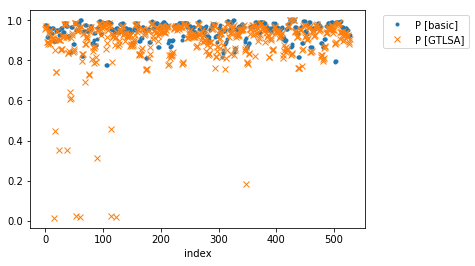

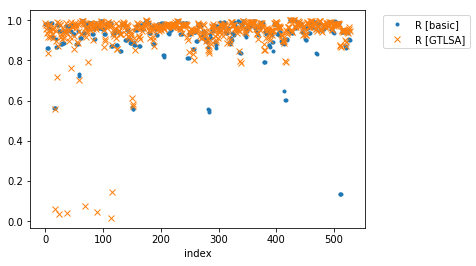

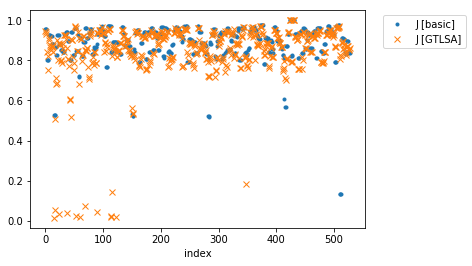

In [89]:
compare_PRJ_fixed_sample_object('basic','GTLSA')

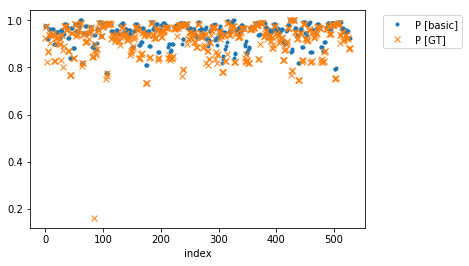

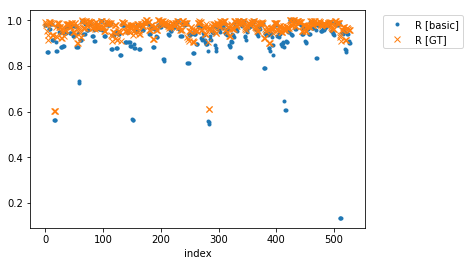

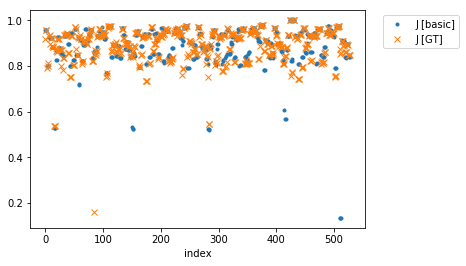

In [90]:
compare_PRJ_fixed_sample_object('basic','GT')

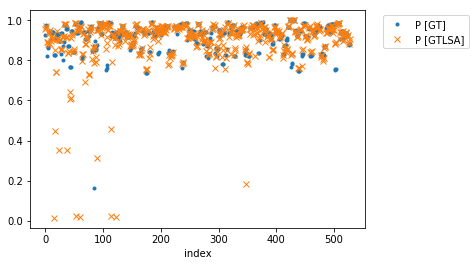

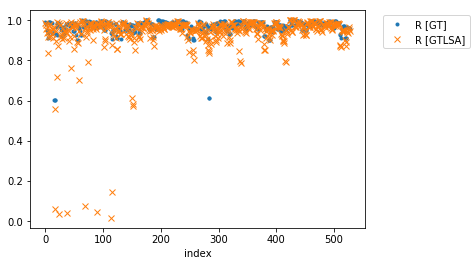

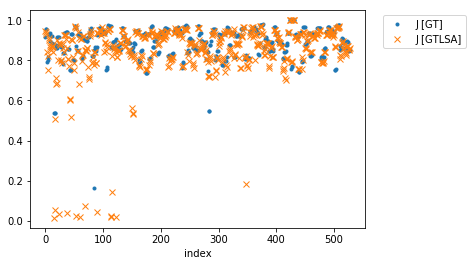

In [91]:
compare_PRJ_fixed_sample_object('GT','GTLSA')

------------------------------------------------------------------------